In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [43]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Query all the dates
session.query(Measurement.date).order_by(Measurement.date).all()


#Query last 12 months in a descending manner 
result_data=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>'2016-12-31').order_by(Measurement.date.desc()).all()
result_data

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [11]:
# Calculate the date 1 year ago from the last data point in the database
last_data_point=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_data_point)

query_date=dt.date(2017,8,23)-dt.timedelta(days=365)
print(query_date)

('2017-08-23',)
2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date, Measurement.prcp,Measurement.station,Measurement.tobs).all()
results

[('2010-01-01', 0.08, 'USC00519397', 65.0),
 ('2010-01-02', 0.0, 'USC00519397', 63.0),
 ('2010-01-03', 0.0, 'USC00519397', 74.0),
 ('2010-01-04', 0.0, 'USC00519397', 76.0),
 ('2010-01-06', None, 'USC00519397', 73.0),
 ('2010-01-07', 0.06, 'USC00519397', 70.0),
 ('2010-01-08', 0.0, 'USC00519397', 64.0),
 ('2010-01-09', 0.0, 'USC00519397', 68.0),
 ('2010-01-10', 0.0, 'USC00519397', 73.0),
 ('2010-01-11', 0.01, 'USC00519397', 64.0),
 ('2010-01-12', 0.0, 'USC00519397', 61.0),
 ('2010-01-14', 0.0, 'USC00519397', 66.0),
 ('2010-01-15', 0.0, 'USC00519397', 65.0),
 ('2010-01-16', 0.0, 'USC00519397', 68.0),
 ('2010-01-17', 0.0, 'USC00519397', 64.0),
 ('2010-01-18', 0.0, 'USC00519397', 72.0),
 ('2010-01-19', 0.0, 'USC00519397', 66.0),
 ('2010-01-20', 0.0, 'USC00519397', 66.0),
 ('2010-01-21', 0.0, 'USC00519397', 69.0),
 ('2010-01-22', 0.0, 'USC00519397', 67.0),
 ('2010-01-23', 0.0, 'USC00519397', 67.0),
 ('2010-01-24', 0.01, 'USC00519397', 71.0),
 ('2010-01-25', 0.0, 'USC00519397', 67.0),
 ('201

In [60]:
# Save the query results as a Pandas DataFrame and set the index to the date column
results_df=pd.DataFrame(result_data)
results_df['date']=results_df['date'].str.replace("-","").astype(int)

results_df.dropna()
results_df.head()

,date,prcp
0,20170823,0.00
1,20170823,0.00
2,20170823,0.08
3,20170823,0.45
4,20170822,0.00


In [61]:
# Sort the dataframe by date of the most recent year
results_df.sort_values(by=['date'])
results_df.head()

,date,prcp
0,20170823,0.00
1,20170823,0.00
2,20170823,0.08
3,20170823,0.45
4,20170822,0.00


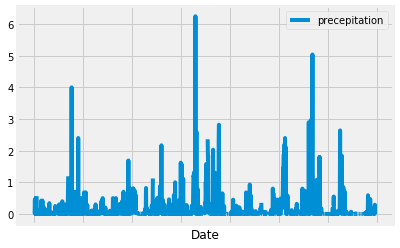

In [63]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis=np.arange(len(results_df['date']))
y_axis= results_df['prcp']
plt.plot(x_axis, y_axis,label='precepitation')
#plt.figure(figsize=(8,9))
plt.xlabel("Date")
plt.tight_layout
plt.tick_params(labelbottom=False)
plt.legend()
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.prcp.describe()

count    1267.000000
mean        0.165927
std         0.453913
min         0.000000
25%         0.000000
50%         0.000000
75%         0.105000
max         6.250000
Name: prcp, dtype: float64

In [17]:
# Design a query to show how many stations are available in this dataset?
station_df=pd.read_sql('SELECT station FROM station', engine)
station_df

stations=session.query(Station.station).count()
stations

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order. DESC code
active_station=pd.read_sql('''SELECT station, COUNT (station) AS most_active
                        FROM measurement GROUP BY station ORDER BY most_active DESC''',engine)

active_station

,station,most_active
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [39]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp= pd.read_sql('''SELECT station, MAX(tobs) AS Max_temp,
                    MIN(tobs) AS Min_temp,
                    AVG(tobs) AS avg_temp
                    FROM measurement GROUP BY station''',engine)
temp

#to filter by the most active station...

# temp_active_station= pd.read_sql('''SELECT station,
#                     WHERE station='USC00519281',
#                     MAX(tobs) AS Max_temp,
#                     MIN(tobs) AS Min_temp,
#                     AVG(tobs) AS avg_temp,
#                     FROM measurement GROUP BY station''',engine)
# temp_active_station

,station,Max_temp,Min_temp,avg_temp
0,USC00511918,87.0,53.0,71.615968
1,USC00513117,85.0,59.0,72.689184
2,USC00514830,85.0,58.0,74.873297
3,USC00516128,84.0,58.0,70.915008
4,USC00517948,87.0,58.0,74.684402
5,USC00518838,83.0,58.0,72.724070
6,USC00519281,85.0,54.0,71.663781
7,USC00519397,87.0,56.0,74.553231
8,USC00519523,85.0,56.0,74.543649


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_histogram= pd.read_sql('''SELECT date, tobs
                                FROM measurement
                                WHERE station='USC00519281'
                                AND date>='2016-0818'
                                ''',engine)
station_histogram.dropna()
station_histogram.head()

,date,tobs
0,2016-09-01,80.0
1,2016-09-02,80.0
2,2016-09-03,78.0
3,2016-09-04,78.0
4,2016-09-05,78.0


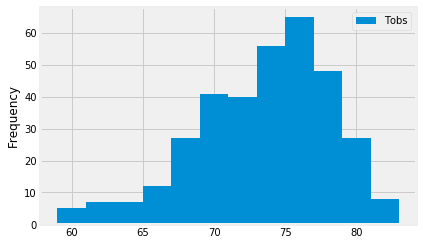

In [22]:
#plot histogram
station_histogram["tobs"]=station_histogram["tobs"].astype(int)
x_axis=station_histogram["tobs"]
y_axis=station_histogram["tobs"]
plt.hist(x_axis,bins=12, label="Tobs")
plt.legend()
plt.ylabel("Frequency")
plt.show()

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [40]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_summary=calc_temps('2016-08-10','2016-08-22')
temp_for_trip=pd.DataFrame(temp_summary,columns=['min','average','max'])
temp_for_trip

,min,average,max
0,71.0,78.166667,83.0


<function matplotlib.pyplot.show(*args, **kw)>

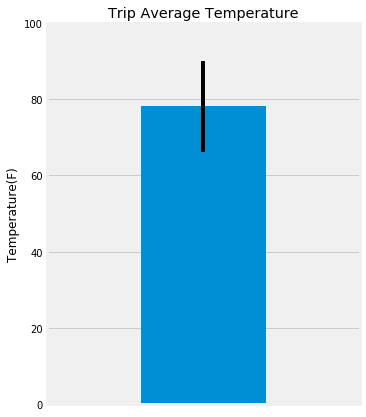

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

y=temp_for_trip['average']
yerr=temp_for_trip['max']-temp_for_trip['min']
x=1
plt.figure(figsize=(5,7))
plt.bar(x,y,yerr=yerr)

plt.ylim(0,100)
plt.xlim(0,2)

# Use "Trip Avg Temp" as your Title
plt.title("Trip Average Temperature")
plt.ylabel("Temperature(F)")
plt.grid(axis='x')
#removes xaxis labels
plt.tick_params(labelbottom=False)
plt.show

In [57]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def calc_rainfall(start_date, end_date):
    """CPRCP, station, latitude, longitude and elevation for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        CPRCP, station, latitude and longitude and elevation 
    """
    
    return session.query(func.sum(Measurement.prcp), Station.latitude, Station.longitude,Station.elevation, Station.name).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_rainfall('2017-01-01', '2017-01-07'))

[(21.239999999999988, 21.2716, -157.8168, 3.0, 'WAIKIKI 717.2, HI US')]


In [58]:
session.query(func.sum(Measurement.prcp), Station.latitude, Station.longitude,Station.elevation, Station.name).all()

[(26173.170000002512, 21.2716, -157.8168, 3.0, 'WAIKIKI 717.2, HI US')]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


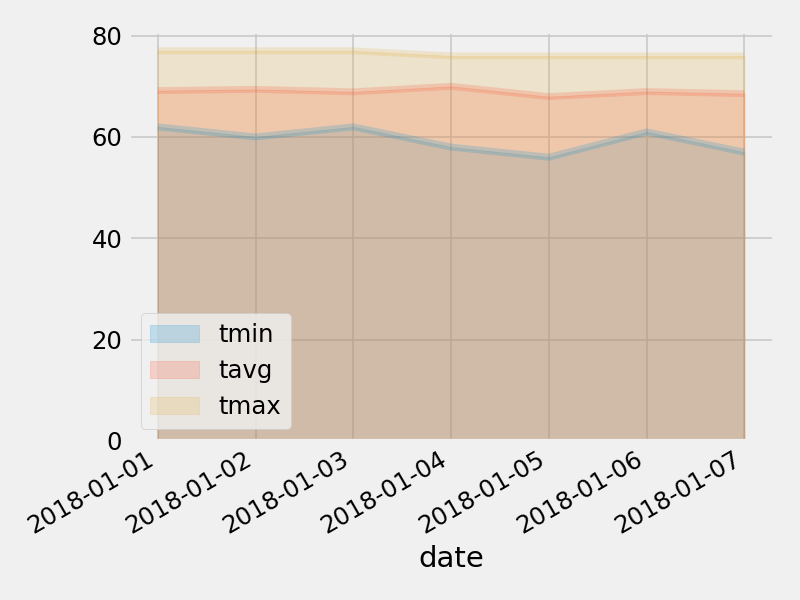

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
